In [10]:

import pandas as pd
import sys

sys.path.insert(1, '../rule_lib')

from rule_benchmark import *

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
FOLDERS = ["approach1", "approach2"]

In [13]:
train_total = pd.read_pickle("train.pkl")
test_total = pd.read_pickle("test.pkl")

TOP_K_SAMPLES = 1

train = train_total[train_total["ranking"] < TOP_K_SAMPLES]
test = test_total[test_total["ranking"] < TOP_K_SAMPLES]

Number of rules:  35
Number of input variables:  4
Number of output variables:  4

approach1/:

Container:
Train: 0.9787685774946921
Test: 0.9484126984126984

Traversal:
Train: 0.9457943925233645
Test: 0.7959183673469388

Data Layout:
Train: 1.0
Test: 1.0

Newton 3:
Train: 0.9660194174757282
Test: 0.8571428571428571


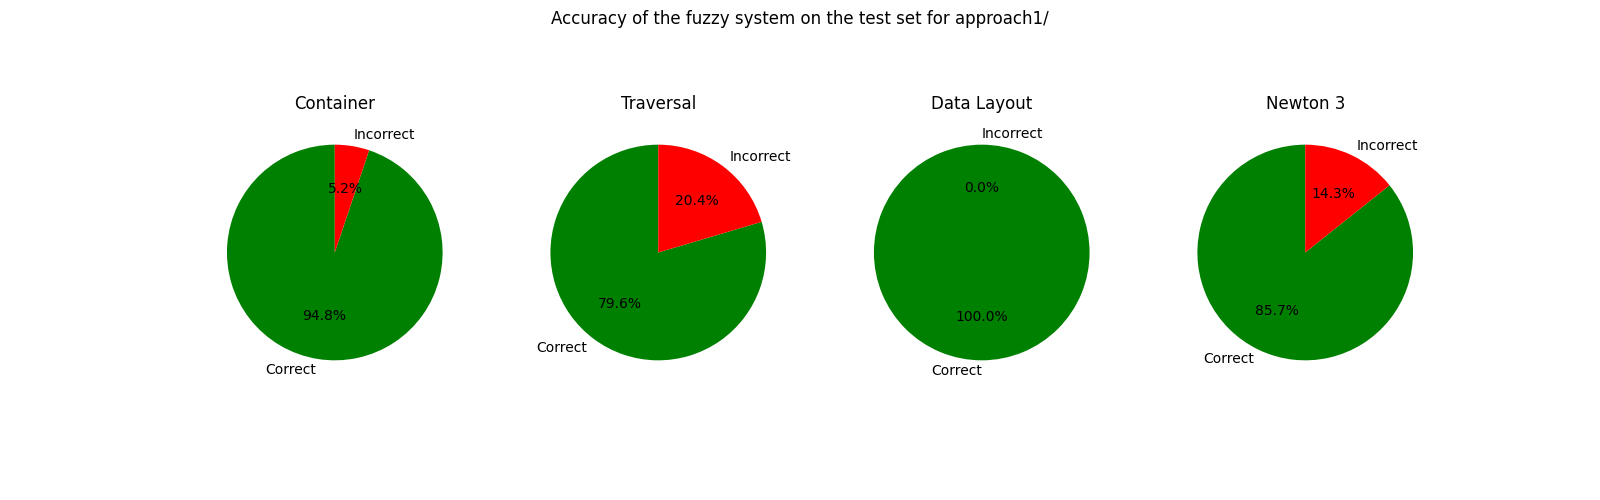

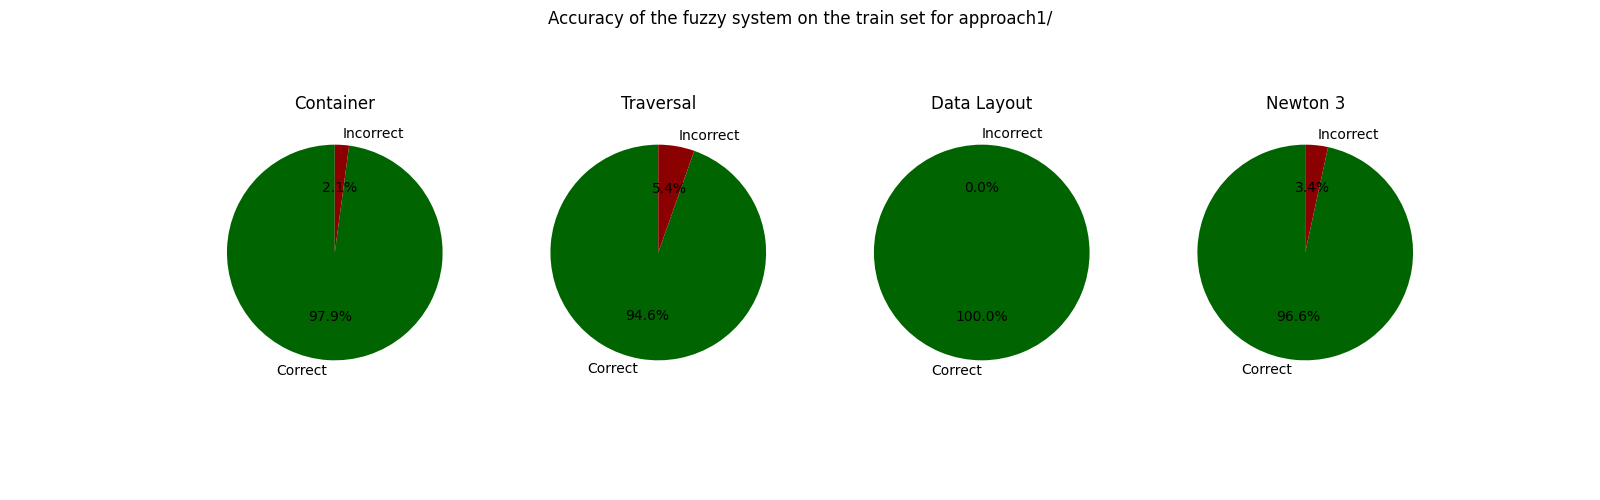

Number of rules:  35
Number of input variables:  4
Number of output variables:  4

approach2/:

Container:
Train: 0.9797441364605544
Test: 0.9484126984126984

Traversal:
Train: 0.9207920792079208
Test: 0.7959183673469388

Data Layout:
Train: 1.0
Test: 1.0

Newton 3:
Train: 0.9828009828009828
Test: 0.8571428571428571


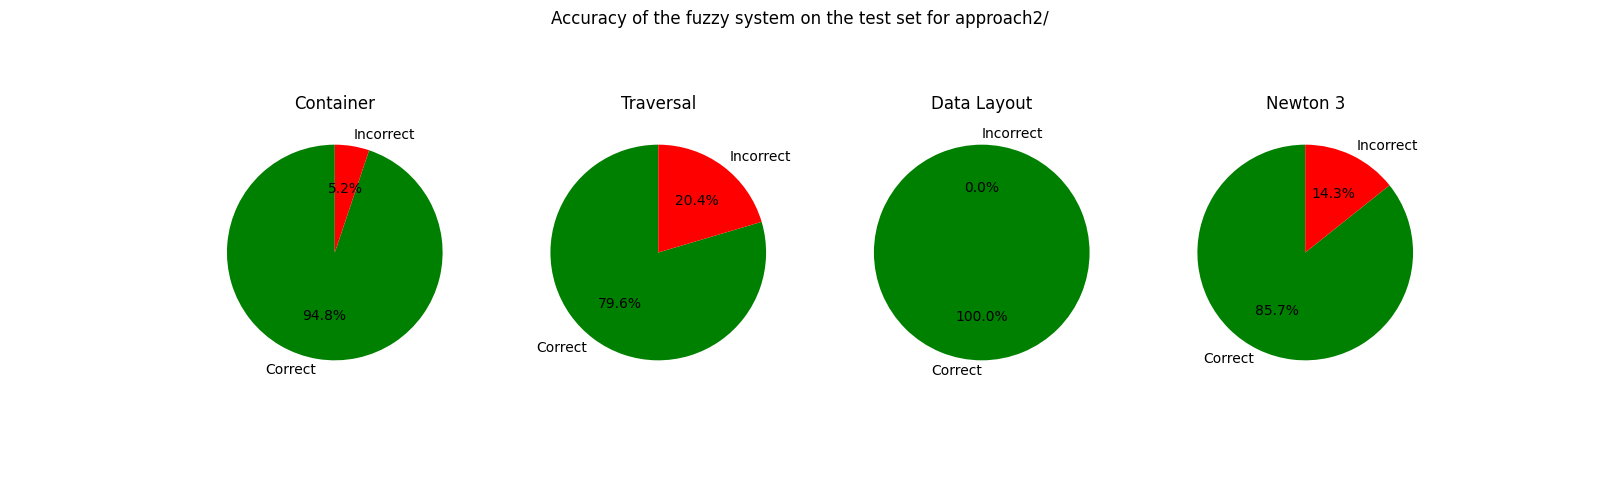

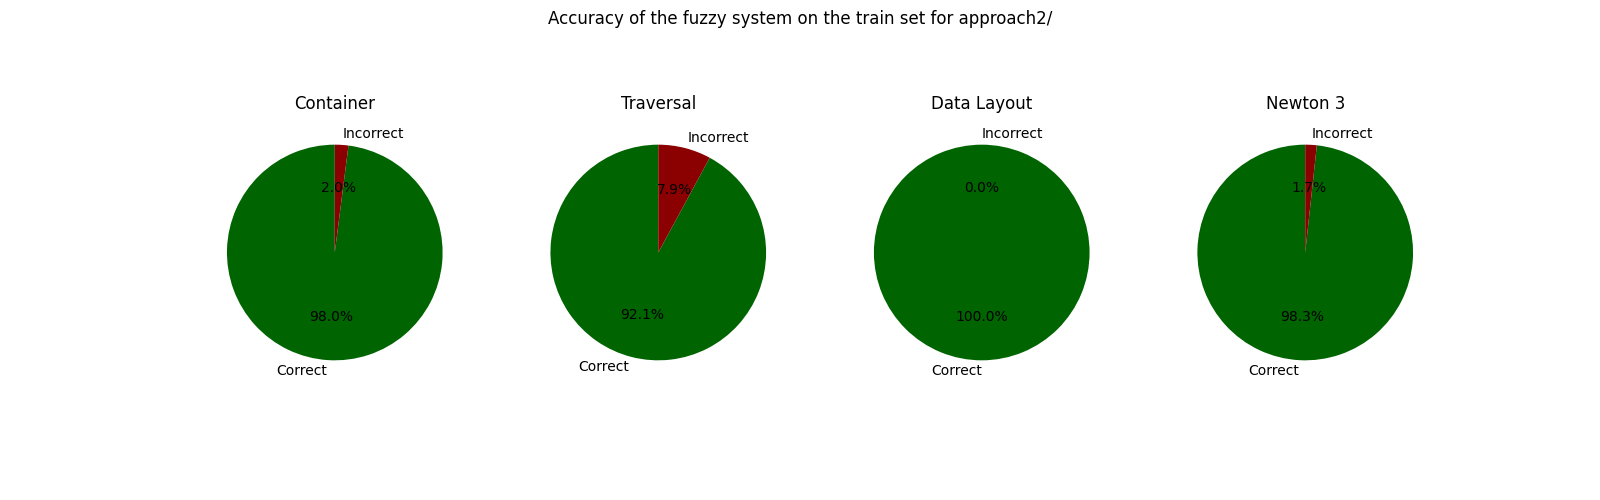

In [14]:
benchmark_rules("approach1/", train, test)
fiss, algo_ranking = benchmark_rules("approach2/", train, test)

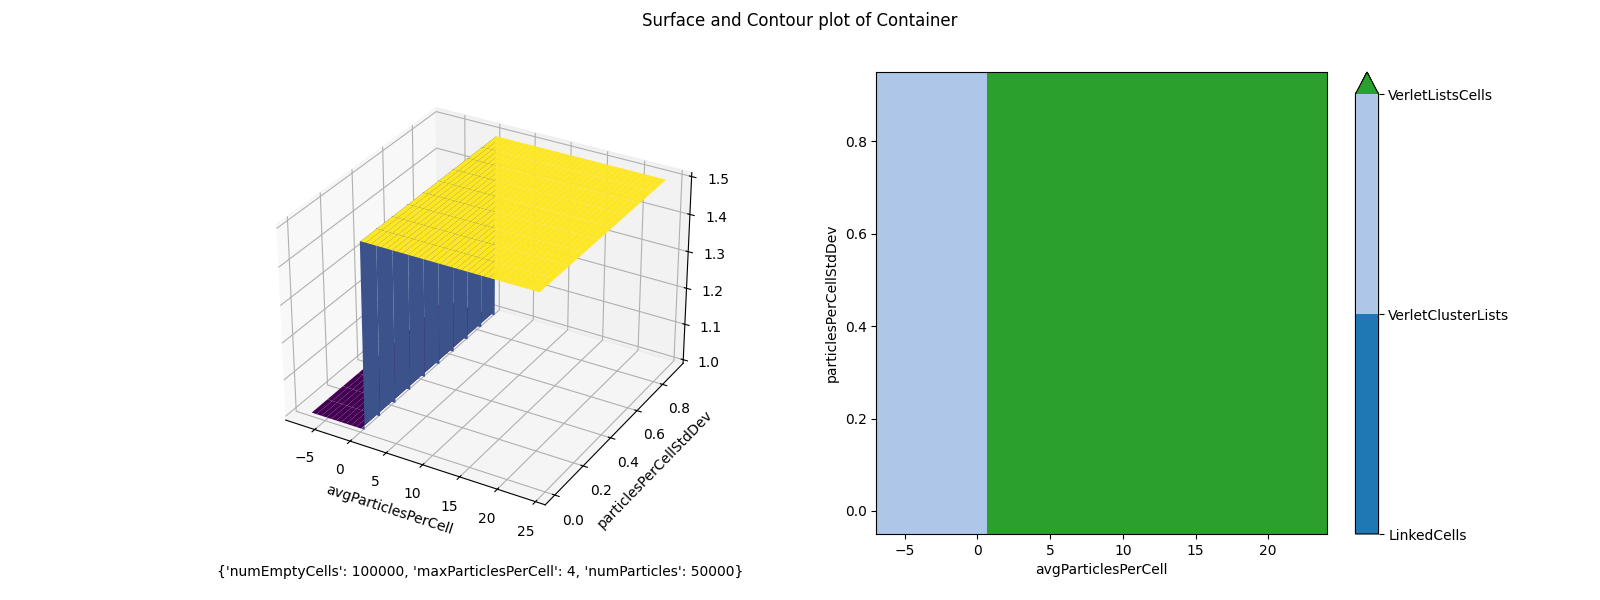

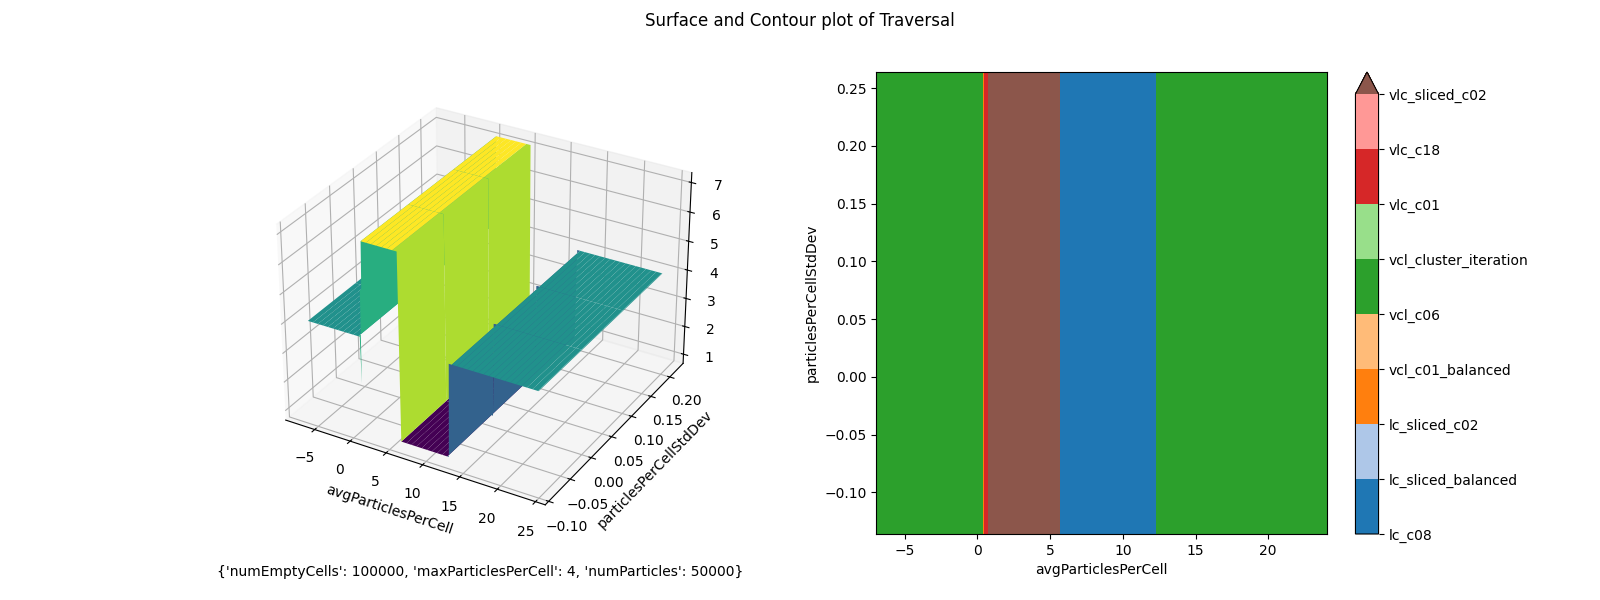

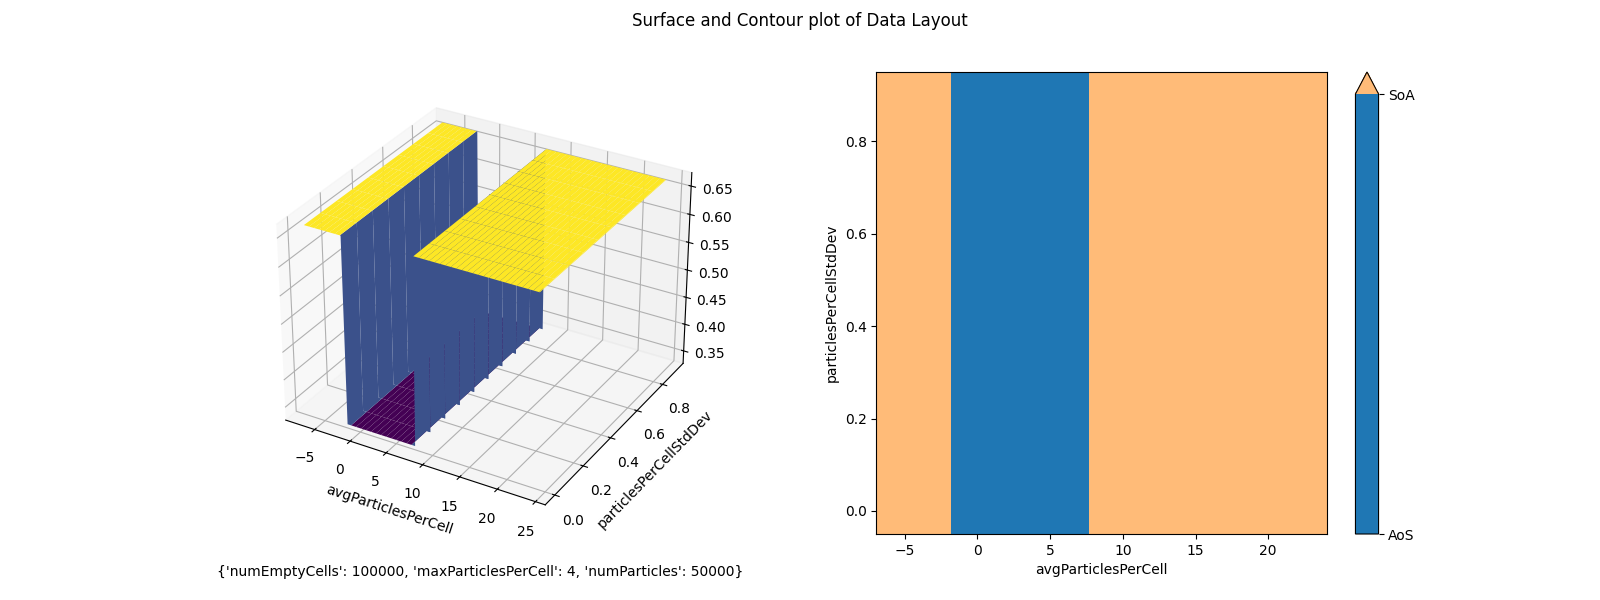

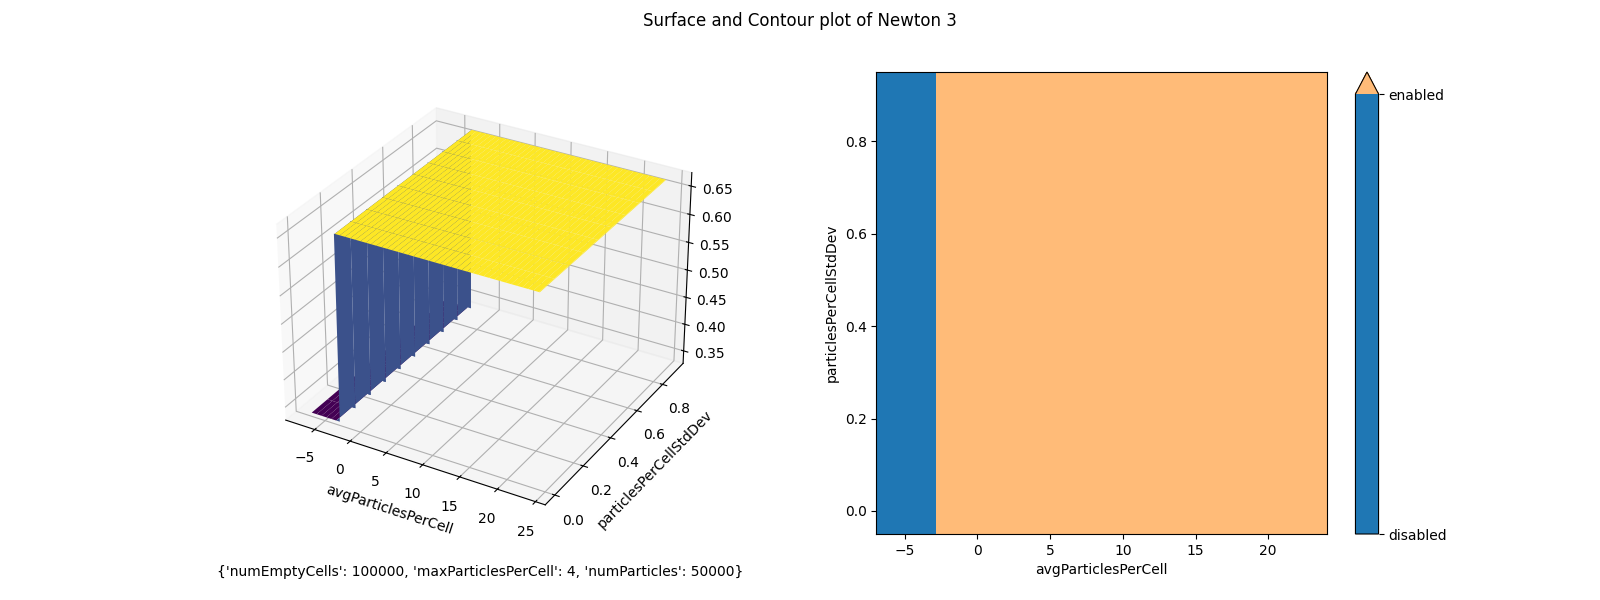

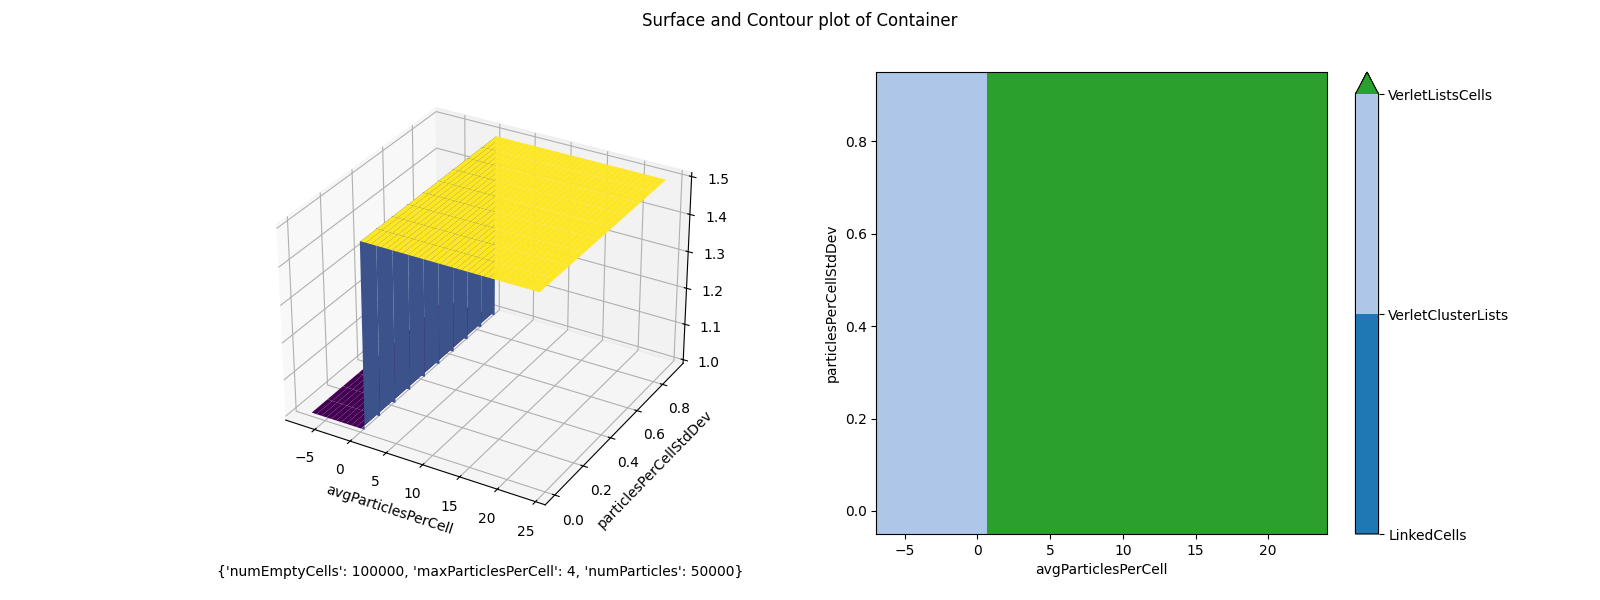

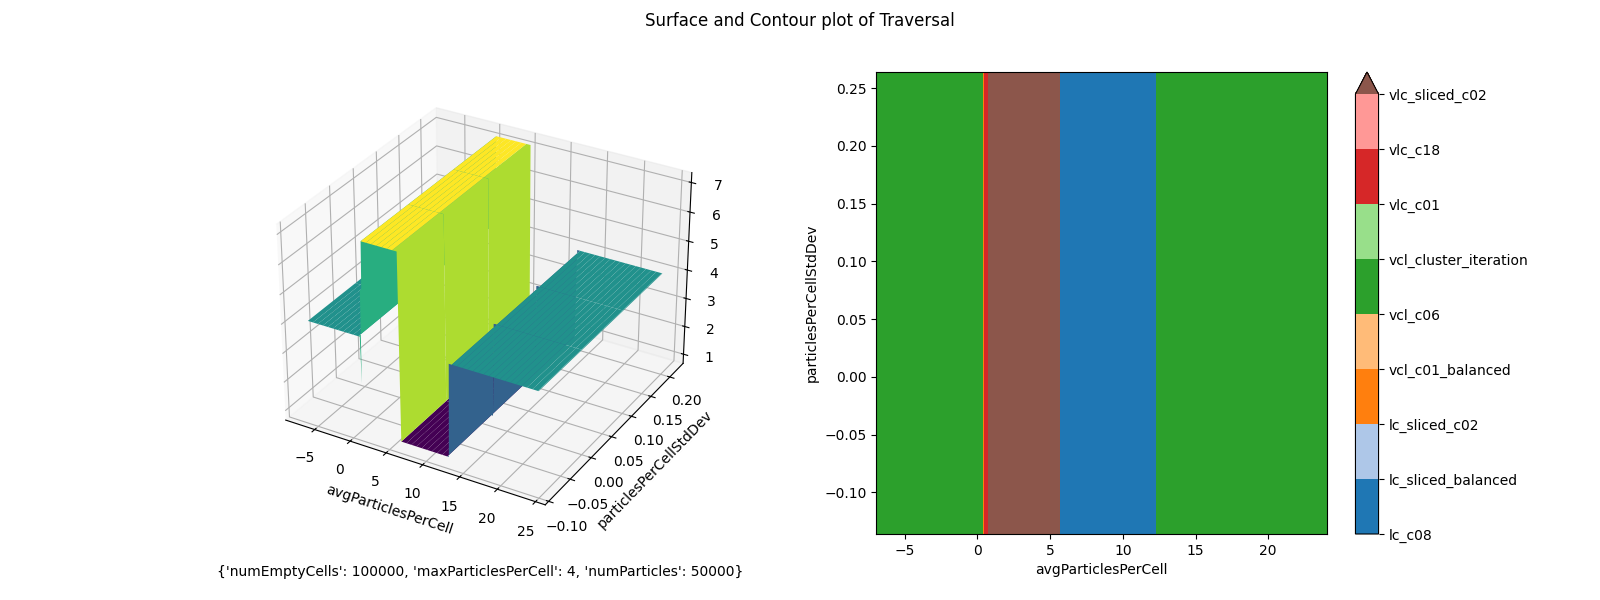

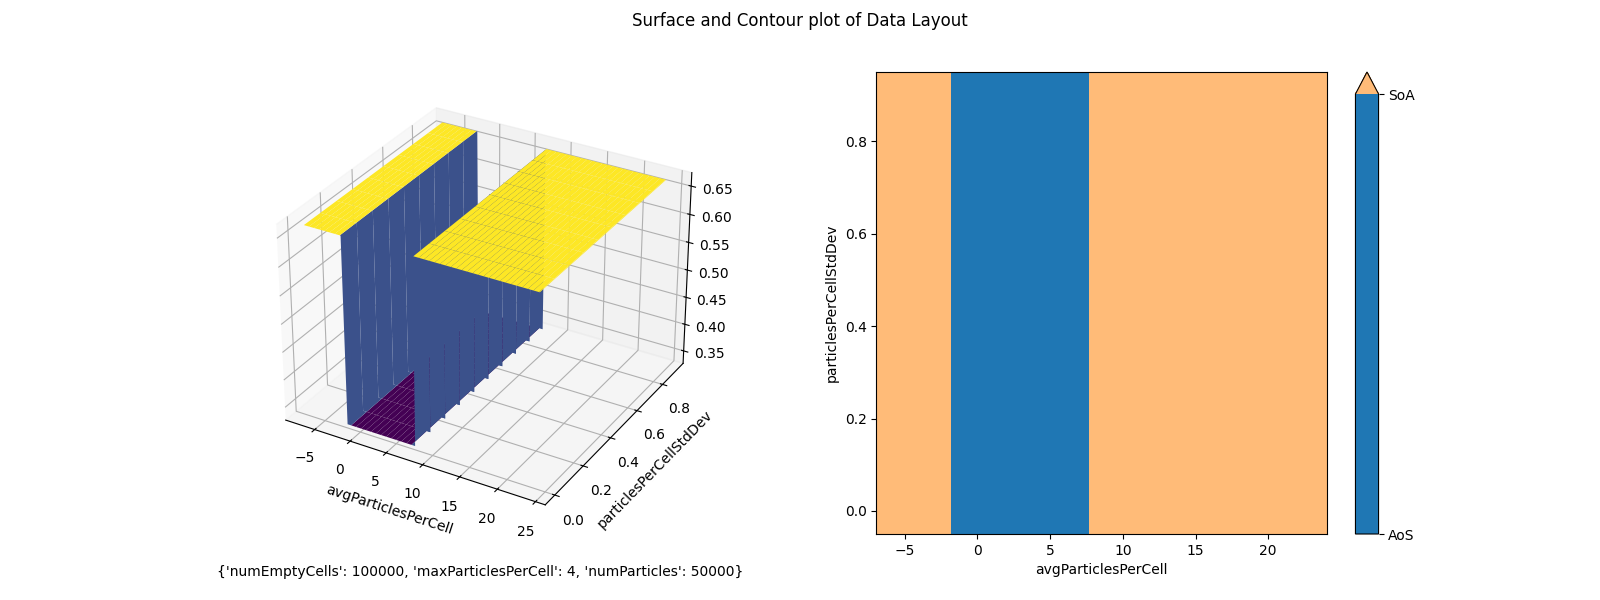

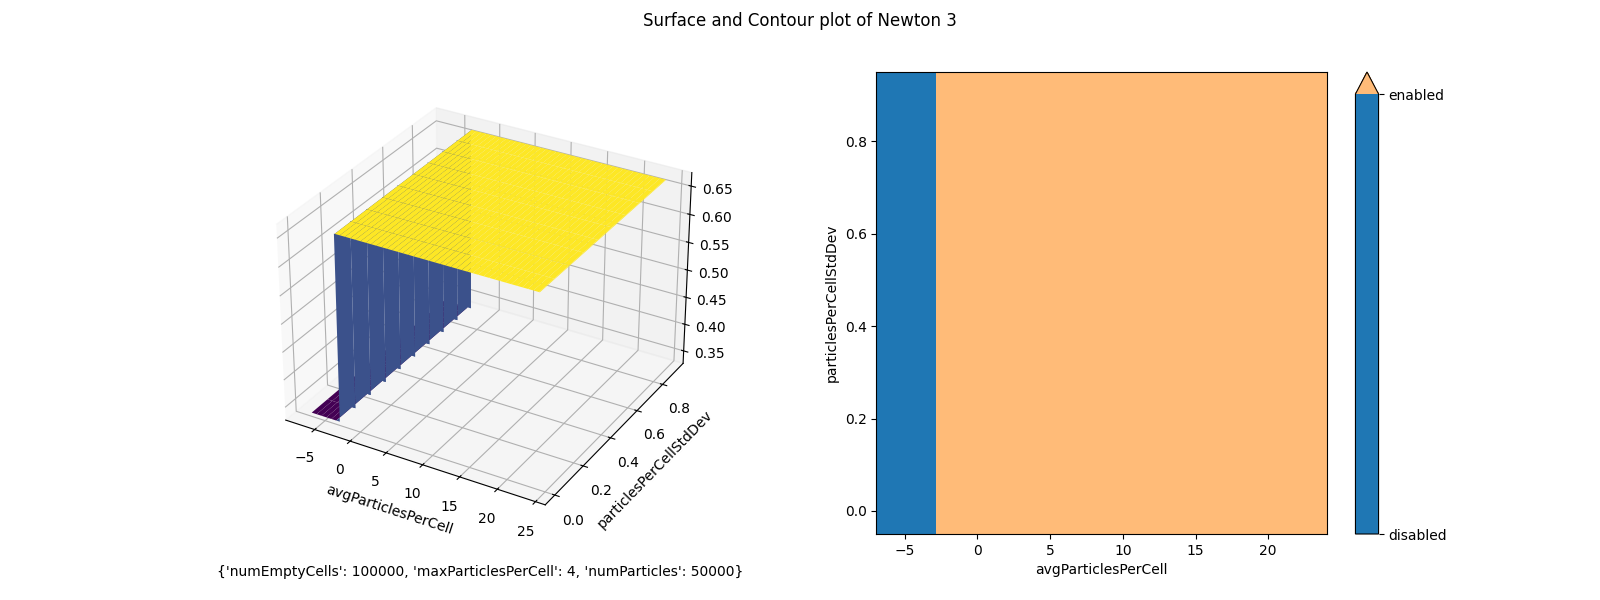

In [15]:
for fis in fiss.values():
    dim = fis.consequent_name
    label_map = {}
    for algo, value in algo_ranking[dim].items():
        label_map[value] = algo

    plot = plot3D_surface(fis.getInputCrispSets(), lambda data: algo_ranking[dim][fis.predictClosest(
        data, algo_ranking[dim])[1]], {
        "y": "particlesPerCellStdDev", "x": "avgParticlesPerCell", "z": dim}, labelMap=label_map, delta=0.1, fixed_values={"numEmptyCells": 100000, "maxParticlesPerCell": 4, "numParticles": 50000})
    plot.show()

# Findings

- MoM works way better than the other methods.
- This is probably since the output variable is categorical and therefore interpolating between them is not a good idea.
  - Also the placement on the x-axis is somehow arbitrary. This also makes interpolation meaningless
- Traversal is very hard to predict. Maybe because there are so many possible values.